# Random Forest Classifier carbon and silicon isotopes
## Added features importance and confusion matrix

In [84]:
#Imports
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [85]:
# Read csv file
carbon_silicon = pd.read_csv('presolargrains_C_Si2.csv')
carbon_silicon.head()

,Type,carbon_isotopes,silicon_29_28,silicon_30_28
0,C,1.300,313.0,377.0
1,AB,1.420,-59.0,19.0
2,AB,1.854,8.0,56.0
3,AB,1.880,20.0,33.0
4,AB,1.910,9.0,103.0


In [86]:
# Set up data and feature names; display dataframe dropping columns
data = carbon_silicon.drop("Type", axis=1)
feature_names = data.columns
data.head()

,carbon_isotopes,silicon_29_28,silicon_30_28
0,1.300,313.0,377.0
1,1.420,-59.0,19.0
2,1.854,8.0,56.0
3,1.880,20.0,33.0
4,1.910,9.0,103.0


In [87]:
target = carbon_silicon['Type']
target_names = ['AB', 'C', 'M', 'N', 'U', 'X', 'Y', 'Z']

In [88]:
# Separate data into train and test buckets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

## Scale the data using MinMaxScalar

In [89]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train the model; run the test score

In [90]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.9744869661674986

In [23]:
# Save fitted model to file
filename = 'RandomForestCls_C_Si.sav'
joblib.dump(rf, filename)

['RandomForestCls_C_Si.sav']

# Summary:

## Random Forest Classifier carbon silicon:  96.8%

## Feature Importance

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 0 (0.588224)
2. feature 1 (0.214826)
3. feature 2 (0.196950)


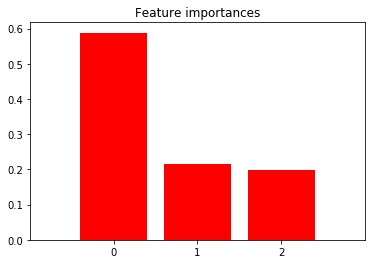

In [24]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(3):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(3), importances[indices],
       color="r", align="center")
plt.xticks(range(3), indices)
plt.xlim([-1, 3])
plt.show()

## Predict

In [25]:
predicted = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predicted)

In [26]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=target_names, index=target_names)
cm

,AB,C,M,N,U,X,Y,Z
AB,183,0,2,1,0,0,0,0
C,0,4,0,0,0,0,0,0
M,2,0,3016,0,1,2,8,17
N,2,0,0,1,0,0,0,0
U,0,1,10,0,0,0,0,0
X,0,0,3,0,0,97,0,0
Y,0,0,2,0,0,3,121,0
Z,3,0,35,0,0,1,2,89


## Confusion Matrix as heatmap

Text(0.5, 1.0, 'Confusion Matrix Random Forest Classifer C Si')

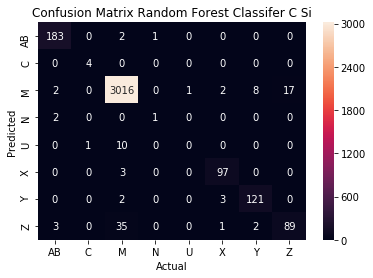

In [27]:
ax=plt.subplot()
sns.heatmap(cm, annot=True, fmt="d")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix Random Forest Classifer C Si')